In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pyflct
import h5py

<h1 style = "color:black; font-family:Sans-Serif">COBOL5D Timeseries</h1>

In [12]:
# Opening all of the available files
import os
def sorted_directory_listing_with_os_scandir(directory):
    with os.scandir(directory) as entries:
        sorted_entries = sorted(entries, key=lambda entry: entry.name)
        sorted_items = [entry.name for entry in sorted_entries]
    return sorted_items

cwd = os.getcwd()
f_names = sorted_directory_listing_with_os_scandir(cwd)
#print(f_names)
f_names1 = []
for f_name in f_names:
    if f_name.endswith(".h5"):
        f_names1.append(f_name)
print(len(f_names1))
#T = np.empty([len(f_names1), 40, 480, 480])
#B_z = np.empty([len(f_names1), 40, 480, 480])
#V_x = np.empty([len(f_names1), 40, 480, 480])
#V_y = np.empty([len(f_names1), 40, 480, 480])
#V_z = np.empty([len(f_names1), 40, 480, 480])
T = np.empty([5, 40, 480, 480])
B_z = np.empty([5, 40, 480, 480])
V_x = np.empty([5, 40, 480, 480])
V_y = np.empty([5, 40, 480, 480])
V_z = np.empty([5, 40, 480, 480])
for f_name in f_names1:
    with h5py.File(f_name, 'r') as h5f:
        #print(h5f.keys())
        #print(j)
        Temperatures = h5f['T'][:]
        Bz = h5f['bz'][:]
        Vx = h5f['vx'][:]
        Vy = h5f['vy'][:]
        Vz = h5f['vz'][:]
        for j in range(len(T)):
            print(j)
            T[j] = Temperatures
            B_z[j] = Bz
            V_x[j] = Vx
            V_y[j] = Vy
            V_z[j] = Vz


61
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4


In [9]:

np.shape(T[1])

(40, 480, 480)

In [11]:
print(B_z[1])

[[[ 6.11625862e+00  1.61939468e+01  2.75820217e+01 ... -4.81980133e+00
   -2.08157754e+00  1.07160187e+00]
  [ 1.46232271e+00  8.78601837e+00  1.92883110e+01 ... -5.35498953e+00
   -3.69158745e+00 -1.80514848e+00]
  [-1.00356092e+01 -8.26644421e-01  1.04991560e+01 ... -2.49511547e+01
   -2.13697662e+01 -1.59560747e+01]
  ...
  [ 2.77501202e+01  4.28179169e+01  4.83686409e+01 ... -4.56010199e+00
    3.08716655e+00  1.35947437e+01]
  [ 1.85396900e+01  3.38599319e+01  4.26178246e+01 ... -4.98078823e+00
   -3.93546484e-02  6.80522108e+00]
  [ 1.13503857e+01  2.42432594e+01  3.51775322e+01 ... -4.78649139e+00
   -1.29527140e+00  3.30773091e+00]]

 [[ 4.37747049e+00  1.37117100e+01  2.46570244e+01 ... -5.11853838e+00
   -3.33682394e+00 -5.73321283e-01]
  [-6.32761359e-01  6.85774517e+00  1.69870682e+01 ... -8.02345181e+00
   -6.03870916e+00 -4.16592503e+00]
  [-1.22322350e+01 -2.39818335e+00  9.16663933e+00 ... -4.83383217e+01
   -3.39061241e+01 -2.08659763e+01]
  ...
  [ 2.22527332e+01  3.7

In [14]:
# Stacking datasets into numpy arrays
for f_name in f_names1:
    with h5py.File(f_name,"r") as f:
        ds_names = list(f.keys())
        n_slices = 8
        ds_shape = f[ds_names[0]].shape
        arr_shape =  ds_shape + (n_slices,)
        ds_arr = np.zeros(arr_shape,dtype=f[ds_names[0]].dtype)
        print(f'array; Type: {ds_arr.dtype}, Shape: {ds_arr.shape}')
        print(f'{ds_arr.shape[:-1]}')
        
        for cnt,ds in enumerate(ds_names[:n_slices]):
            if isinstance(f[ds], h5py.Dataset) and \
               f[ds].shape == ds_arr.shape[:-1] and  f[ds].dtype == ds_arr.dtype:
                print(f'For dataset {ds}; Type: {f[ds].dtype}, Shape: {f[ds].shape}')
                ds_arr[...,cnt] = f[ds][()]

array; Type: float32, Shape: (40, 480, 480, 8)
(40, 480, 480)
For dataset T; Type: float32, Shape: (40, 480, 480)
For dataset bolometric; Type: float32, Shape: (40, 480, 480)
For dataset bx; Type: float32, Shape: (40, 480, 480)
For dataset by; Type: float32, Shape: (40, 480, 480)
For dataset bz; Type: float32, Shape: (40, 480, 480)
For dataset vx; Type: float32, Shape: (40, 480, 480)
For dataset vy; Type: float32, Shape: (40, 480, 480)
For dataset vz; Type: float32, Shape: (40, 480, 480)
array; Type: float32, Shape: (40, 480, 480, 8)
(40, 480, 480)
For dataset T; Type: float32, Shape: (40, 480, 480)
For dataset bolometric; Type: float32, Shape: (40, 480, 480)
For dataset bx; Type: float32, Shape: (40, 480, 480)
For dataset by; Type: float32, Shape: (40, 480, 480)
For dataset bz; Type: float32, Shape: (40, 480, 480)
For dataset vx; Type: float32, Shape: (40, 480, 480)
For dataset vy; Type: float32, Shape: (40, 480, 480)
For dataset vz; Type: float32, Shape: (40, 480, 480)
array; Type: f

In [16]:
np.shape(ds_arr)

(40, 480, 480, 8)

In [19]:
np.shape(V_z)

(5, 40, 480, 480)

In [20]:
T = T.transpose(0, 2, 3, 1)
B_z = B_z.transpose(0, 2, 3, 1)
V_x = V_x.transpose(0, 2, 3, 1)
V_y = V_y.transpose(0, 2, 3, 1)
V_z = V_z.transpose(0, 2, 3, 1)

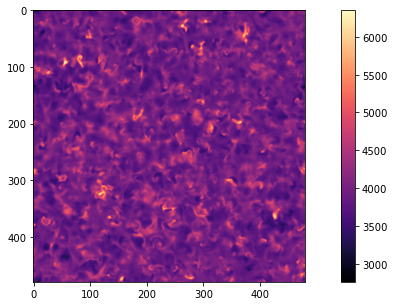

In [23]:
plt.figure(figsize=[13,5])
plt.imshow(T[1,:,:,30], cmap = 'magma')
plt.colorbar()

<h1 style = "color:blue; font-family:Sans-Serif">Testing FLCT on Temperature</h1>

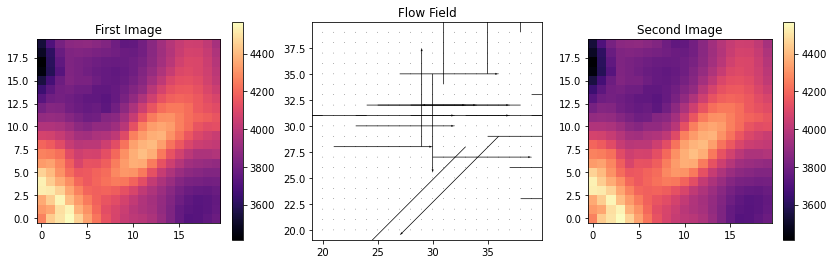

In [32]:
image3 = B_z[1,:,:,30]
image4 = B_z[4,:,:,30]
image1 = T[1,:,:,30]
image2 = T[4,:,:,30]

i_start = 20
i_end = 40
j_start = 20
j_end = 40

vel_x, vel_y, vm = pyflct.flct(image1, image2, 1*30, 1*50, 5.0) # sigma promenjeno

# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image1[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end])
ax2.set_title("Flow Field")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image2[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image")
plt.colorbar()

<h1 style = "color:red; font-family:Sans-Serif"> Testing FLCT on z component of B</h1>

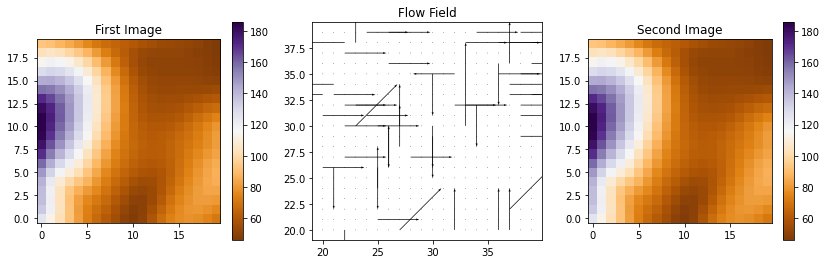

In [44]:
i_start = 20
i_end = 40
j_start = 20
j_end = 40

vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*50, 5.0) # sigma promenjeno

# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='PuOr')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end])
ax2.set_title("Flow Field")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='PuOr')
ax3.set_title("Second Image")
plt.colorbar()

<h1 style = "color:maroon; font-family:Sans Serif">Comparing mean velocity and FLCT</h1>

In [42]:
B1_view = B_z[1,:,:,30].reshape(240, 2, 240, 2)
B2_view = B_z[2,:,:,30].reshape(240, 2, 240, 2)
B12_mean = (B1_view + B2_view).mean(axis = 3).mean(axis = 1)
B3_view = B_z[3,:,:,30].reshape(240, 2, 240, 2)
B23_mean = (B2_view + B3_view).mean(axis = 3).mean(axis = 1)
vel_x123, vel_y123, vm123 = pyflct.flct(B12_mean, B23_mean, 1, 1*16, 10.0)

vx1 = V_x[1,:,:,30].reshape(240, 2, 240, 2)
vy1 = V_y[1,:,:,30].reshape(240, 2, 240, 2)

vx2 = V_x[2,:,:,30].reshape(240, 2, 240, 2)
vy2 = V_y[2,:,:,30].reshape(240, 2, 240, 2)

vx3 = V_x[3,:,:,30].reshape(240, 2, 240, 2)
vy3 = V_y[3,:,:,30].reshape(240, 2, 240, 2)

vx12 = (vx1 + vx2).mean(axis = 3).mean(axis = 1)/1e5
vy12 = (vy1 + vy2).mean(axis = 3).mean(axis = 1)/1e5

vx23 = (vx2 + vx3).mean(axis = 3).mean(axis = 1)/1e5
vy23 = (vy2 + vy3).mean(axis = 3).mean(axis = 1)/1e5

from scipy.stats import pearsonr
r12x = pearsonr(vel_x123.flatten(), vx12.flatten())
print(r12x)

r12y = pearsonr(vel_y123.flatten(), vy12.flatten())
print(r12y)

PearsonRResult(statistic=0.0034009181499365, pvalue=0.4143828959973598)
PearsonRResult(statistic=0.00019067510441450044, pvalue=0.9635007179210517)


In [46]:
from scipy.ndimage import gaussian_filter
filtered01 = gaussian_filter(vx12.flatten(), sigma = 5, mode = 'wrap')
filtered_flct01 = gaussian_filter(vel_y123.flatten(), sigma = 5, mode = 'wrap')
p = pearsonr(filtered01, filtered_flct01)
print(p)



PearsonRResult(statistic=-0.020634290337062156, pvalue=7.32097888448998e-07)


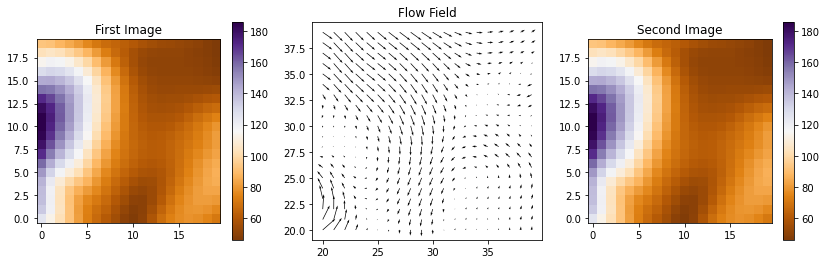

In [48]:
i_start = 20
i_end = 40
j_start = 20
j_end = 40

"""vel_x, vel_y, vm = pyflct.flct(image3, image4, 1*30, 1*50, 5.0) # sigma promenjeno

# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)"""
V_xrel = (V_x[1] + V_x[4])/2/1e5
V_yrel = (V_y[1] + V_y[4])/2/1e5
# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image3[i_start:i_end, j_start:j_end], origin="lower", cmap='PuOr')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           V_xrel[i_start:i_end, j_start:j_end, 30], V_yrel[ i_start:i_end, j_start:j_end, 30])
ax2.set_title("Flow Field")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image4[i_start:i_end, j_start:j_end], origin="lower", cmap='PuOr')
ax3.set_title("Second Image")
plt.colorbar()